# Setup

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re

pd.set_option('display.max_colwidth',200)

In [22]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [32]:
from src.ingestion.loader import load_dataset

/Users/aiman/Studium/Master/2.Semester/EDML/ml-data-profiler/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Dataset

In [35]:
url = "https://huggingface.co/datasets/scikit-learn/adult-census-income"

In [37]:
df = load_dataset(url)

Creating CSV from Arrow format: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 267.41ba/s]


In [38]:
target_col = "income"
sensitive_col = ["sex", "race"]

In [39]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
df.shape

(32561, 15)

In [42]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [43]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [44]:
df.describe(include='all').to_dict()

{'age': {'count': 32561.0,
  'unique': nan,
  'top': nan,
  'freq': nan,
  'mean': 38.58164675532078,
  'std': 13.640432553581341,
  'min': 17.0,
  '25%': 28.0,
  '50%': 37.0,
  '75%': 48.0,
  'max': 90.0},
 'workclass': {'count': 32561,
  'unique': 9,
  'top': 'Private',
  'freq': 22696,
  'mean': nan,
  'std': nan,
  'min': nan,
  '25%': nan,
  '50%': nan,
  '75%': nan,
  'max': nan},
 'fnlwgt': {'count': 32561.0,
  'unique': nan,
  'top': nan,
  'freq': nan,
  'mean': 189778.36651208502,
  'std': 105549.97769702224,
  'min': 12285.0,
  '25%': 117827.0,
  '50%': 178356.0,
  '75%': 237051.0,
  'max': 1484705.0},
 'education': {'count': 32561,
  'unique': 16,
  'top': 'HS-grad',
  'freq': 10501,
  'mean': nan,
  'std': nan,
  'min': nan,
  '25%': nan,
  '50%': nan,
  '75%': nan,
  'max': nan},
 'education.num': {'count': 32561.0,
  'unique': nan,
  'top': nan,
  'freq': nan,
  'mean': 10.0806793403151,
  'std': 2.5727203320673877,
  'min': 1.0,
  '25%': 9.0,
  '50%': 10.0,
  '75%': 12.

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions(df, num_cols=None, cat_cols=None):
    if num_cols is None:
        num_cols = df.select_dtypes(include='number').columns
    if cat_cols is None:
        cat_cols = df.select_dtypes(include='object').columns

    for col in num_cols:
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

    for col in cat_cols:
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Category Distribution: {col}")
        plt.xticks(rotation=45)
        plt.show()

def plot_correlation(df):
    corr = df.select_dtypes(include='number').corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


In [57]:
df_cor = df[['sex','race', 'income']]

In [59]:
df_cor.dtypes

sex       object
race      object
income    object
dtype: object

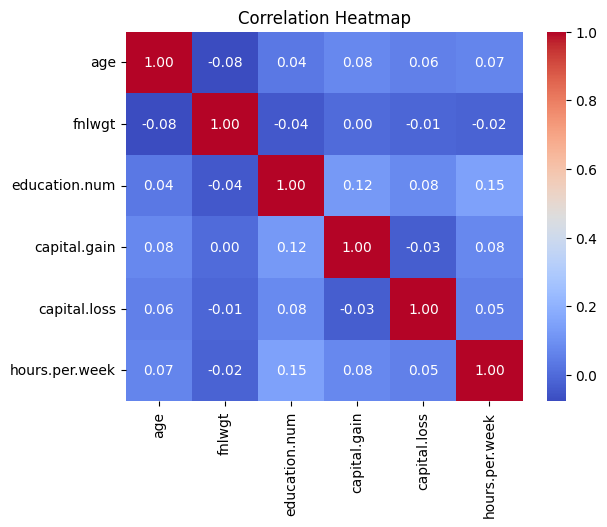

In [61]:
plot_correlation(df)

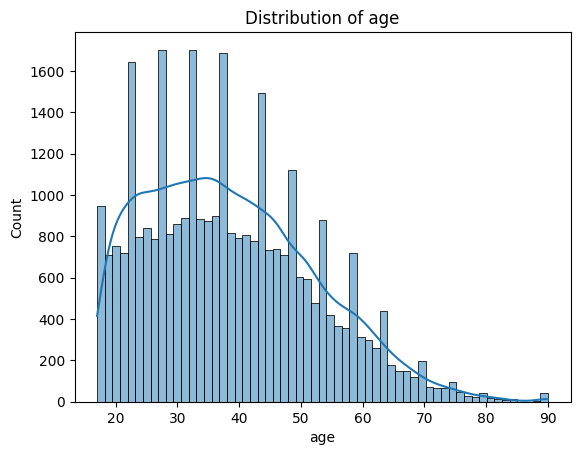

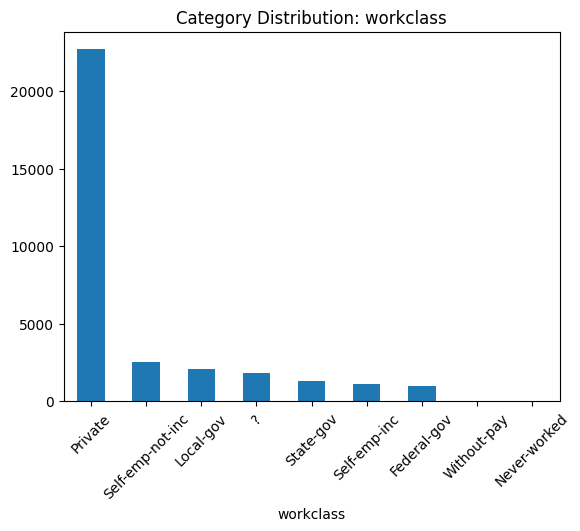

In [63]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

plot_distributions(df, num_cols=num_cols[:1], cat_cols=cat_cols[:1] )

In [65]:
df[target_col].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [67]:
counts =df[target_col].value_counts()
counts

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [196]:
import re
def plot_data_distribution_by_column(df, column_name, save=False, save_path=""):
    """Plot the distribution of values in a DataFrame column.
    
    For categorical columns: bar plot with counts and percentages.
    For numerical columns: histogram with counts.
    """
    data = df[column_name]

    title =  re.sub(r'[_\-.]', ' ', column_name).title()

    if pd.api.types.is_numeric_dtype(data):
        # Numerical column: histogram
        plt.hist(data, bins='auto', edgecolor='black')
        plt.xlabel(title)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {title}")
    else:
        # Categorical column: bar plot with count + percentage
        counts = data.value_counts()
        total = counts.sum()
        ax = counts.plot(kind='bar')
        for i, (label, count) in enumerate(counts.items()):
            pct = count / total * 100
            ax.text(i, count + total * 0.01, f"{count} ({pct:.2f}%)", ha='center', fontsize=9)
        plt.xlabel(title)
        plt.ylabel("Number of Instances")
        plt.title(f"Distribution of {title}")

    if save and save_path:
        plt.savefig(f"{save_path}/{column_name}_distribution.png", bbox_inches="tight")

    plt.show()
    plt.close()    

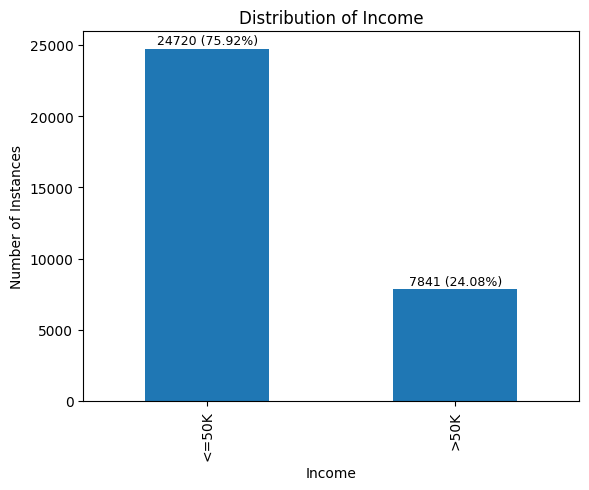

In [198]:
plot_data_distribution_by_column(df, target_col)

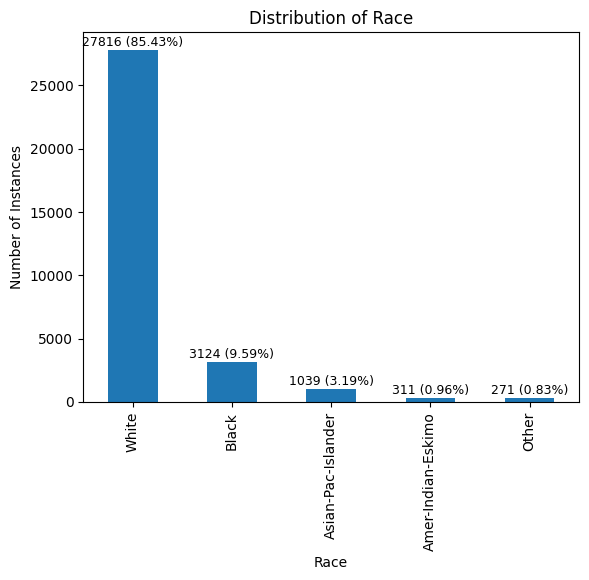

In [200]:
plot_data_distribution_by_column(df, sensitive_col[1])

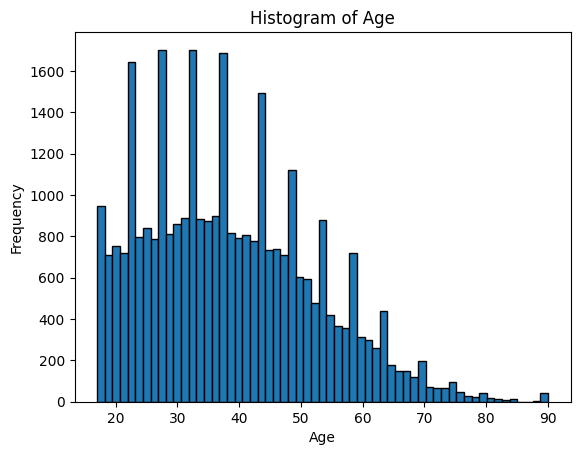

In [202]:
plot_data_distribution_by_column(df, "age")

In [254]:
null_or_empty_counts = (df.isna().sum(axis=0) + (df == '').sum(axis=0)).to_dict()
null_or_empty_counts

{'age': 0,
 'workclass': 0,
 'fnlwgt': 0,
 'education': 0,
 'education.num': 0,
 'marital.status': 0,
 'occupation': 0,
 'relationship': 0,
 'race': 0,
 'sex': 0,
 'capital.gain': 0,
 'capital.loss': 0,
 'hours.per.week': 0,
 'native.country': 0,
 'income': 0}

In [270]:
pd.DataFrame.from_dict(null_or_empty_counts, orient='index', columns=['Number of Null & Empty Values'])

,Number of Null & Empty Values
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
def generate_stats(df: pd.DataFrame, target_col: str, sensitive_col: [str]):
    
    pass

# ToDo
## Overview 

### Dataset statistics
Number of variables	8
Number of observations	561
Missing cells	412
Missing cells (%)	9.2%
Duplicate rows	0
Duplicate rows (%)	0.0%
Total size in memory	254.0 KiB
Average record size in memory	463.7 

### Variable types | how many: 
Text	6, Categorical	2



## Alerts:

type has constant value "bike"	Constant
mileage has 17 (3.0%) missing values	Missing
cc has 106 (18.9%) missing values	Missing
power has 289 (51.5%) missing values	Missing
name has unique values

# ToDO:

for each column (select box):
Distinct	561
Distinct (%)	100.0%
Missing	0
Missing (%)	0.0%
Memory size	35.8 KiB